# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore' )
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
#plt.rcParams['font.size']=18

In [3]:
df = pd.read_csv("marketing_campaign.csv",sep="\t")

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
print(f"Total no of rows = {df.shape[0]}")
print(f"Total no of columns = {df.shape[1]}")

Total no of rows = 2240
Total no of columns = 29


In [6]:
# basic infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
cat_cols = df.select_dtypes(include=[object]).columns
num_cols = df.select_dtypes(include=[int, float]).columns

In [8]:
# Checking null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# Checking null values in percentage:
df.isnull().mean()*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<AxesSubplot:>

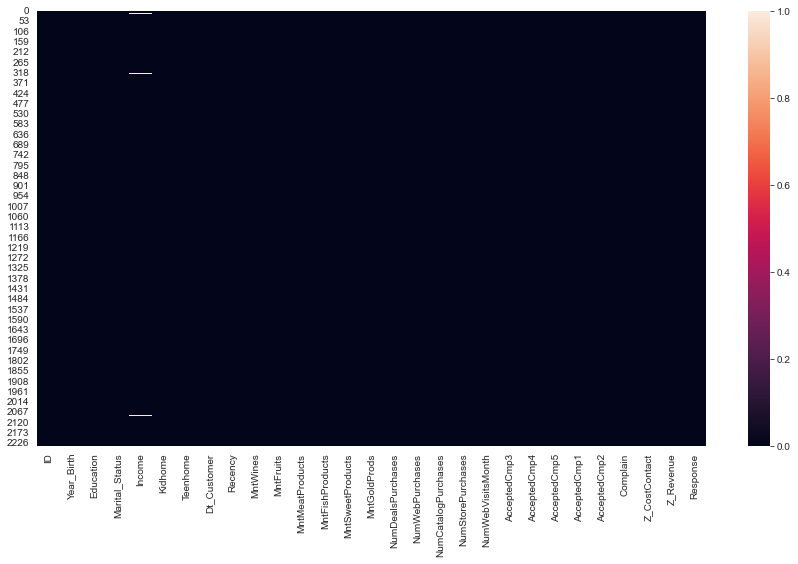

In [10]:
# heatmap for null values
sns.heatmap(df.isnull())

In [11]:
# droping null values
df.dropna(inplace = True)

<AxesSubplot:>

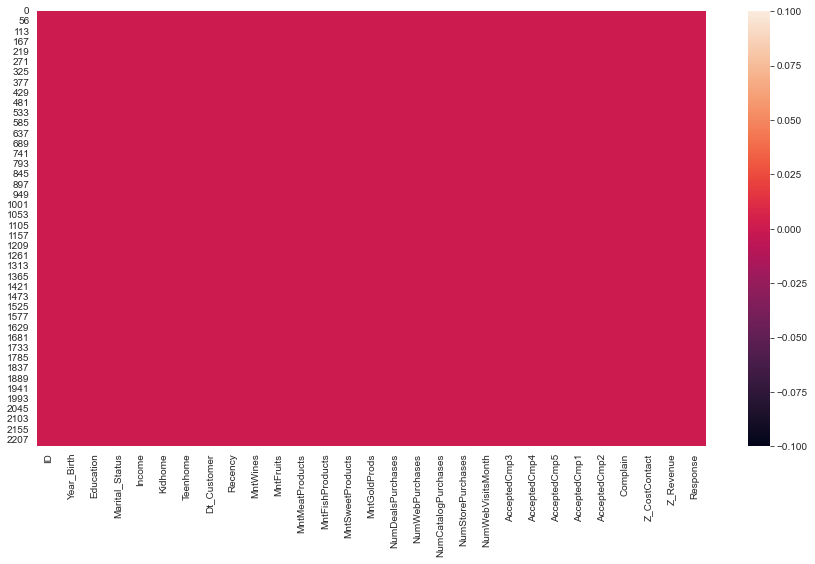

In [12]:
# heatmap for null values
sns.heatmap(df.isnull())

In [13]:
# checking duplicated values
df.duplicated().sum()

0

In [14]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [15]:
# number of unique values is present
for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print("--------------------------------------------------------")

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
--------------------------------------------------------
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
--------------------------------------------------------
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64
--------------------------------------------------------


In [16]:
# converting DT_customer into date time format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format = '%d-%m-%Y')
print(f'Sucessfully converted Dt_Customer to Date time format')

Sucessfully converted Dt_Customer to Date time format


In [17]:
df['year'] = df['Dt_Customer'].dt.year

In [18]:
df['year'].max()

2014

The last purchase of in 2014

In [19]:
# Renaming categories of Marital_Status

df['Marital_Status'] = df['Marital_Status'].str.replace('Together', 'Married')
df['Marital_Status'] = df['Marital_Status'].str.replace('Divorced', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Widow', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('YOLO', 'Single')

In [20]:
# Renaming categories of Education

df['Education'] = df['Education'].str.replace('2n Cycle', 'Master')

In [21]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  year  
0         11         1  2012  
1         11         0  2014  
2         11         0  2013  
3         11         0  2014  
4         11         0  2014  

[5 rows x 30 columns]

In [22]:
# converting columns
df['Childern'] = df['Kidhome']+df['Teenhome']
df['Age'] = 2015-df["Year_Birth"]

In [23]:
# renaming some columns
df = df.rename(columns= {'MntWines':'Wines','MntFruits':'Fruits',
           'MntMeatProducts':'Meat','MntFishProducts':'Fish',
           'MntSweetProducts':'Sweet','MntGoldProds':'Gold'})

df = df.rename(columns={'NumWebPurchases':'Web','NumCatalogPurchases':'Catalog',
          'NumStorePurchases':'Store','NumWebVisitsMonth':'WebVisits/M'})

In [24]:
# total spending 
df['Totalspend'] = df['Wines']+ df['Fruits']+ df['Meat']+ df['Fish']+ df['Sweet']+ df['Gold']

In [25]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58    635  ...             0             0         0   
1  2014-03-08       38     11  ...             0             0         0   
2  2013-08-21       26    426  ...             0             0         0   
3  2014-02-10       26     11  ...             0             0         0   
4  2014-01-19       94    173  ...             0             0         0   

   Z_CostContact  Z_Revenue  Response  year  Childern  Age  Totalspend  
0              3         11         1  2012         0   58        1617  
1              3         11         0  2014         2   61          27  
2              3         11         0  2013         0   50         776  
3              3         11         0  2014         1   31          53  
4              3         11         0  2014         1   34         422  

[5 rows x 33 columns]

In [26]:
# droping some columns
cols = ['ID',"Kidhome","Teenhome"]
df.drop(columns=cols, inplace =True)

In [27]:
# basis describetion
df.describe().T

count          mean           std     min      25%  \
Year_Birth         2216.0   1968.820397     11.985554  1893.0   1959.0   
Income             2216.0  52247.251354  25173.076661  1730.0  35303.0   
Recency            2216.0     49.012635     28.948352     0.0     24.0   
Wines              2216.0    305.091606    337.327920     0.0     24.0   
Fruits             2216.0     26.356047     39.793917     0.0      2.0   
Meat               2216.0    166.995939    224.283273     0.0     16.0   
Fish               2216.0     37.637635     54.752082     0.0      3.0   
Sweet              2216.0     27.028881     41.072046     0.0      1.0   
Gold               2216.0     43.965253     51.815414     0.0      9.0   
NumDealsPurchases  2216.0      2.323556      1.923716     0.0      1.0   
Web                2216.0      4.085289      2.740951     0.0      2.0   
Catalog            2216.0      2.671029      2.926734     0.0      0.0   
Store              2216.0      5.800993      3.250785     0.0      3.0   
WebVisits/M        2216.0      5.319043      2.425359     0.0      3.0   
AcceptedCmp3       2216.0      0.073556      0.261106     0.0      0.0   
AcceptedCmp4       2216.0      0.074007      0.261842     0.0      0.0   
AcceptedCmp5       2216.0      0.073105      0.260367     0.0      0.0   
AcceptedCmp1       2216.0      0.064079      0.244950     0.0      0.0   
AcceptedCmp2       2216.0      0.013538      0.115588     0.0      0.0   
Complain           2216.0      0.009477      0.096907     0.0      0.0   
Z_CostContact      2216.0      3.000000      0.000000     3.0      3.0   
Z_Revenue          2216.0     11.000000      0.000000    11.0     11.0   
Response           2216.0      0.150271      0.357417     0.0      0.0   
year               2216.0   2013.028430      0.685618  2012.0   2013.0   
Childern           2216.0      0.947202      0.749062     0.0      0.0   
Age                2216.0     46.179603     11.985554    19.0     38.0   
Totalspend         2216.0    607.075361    602.900476     5.0     69.0   

                       50%       75%       max  
Year_Birth          1970.0   1977.00    1996.0  
Income             51381.5  68522.00  666666.0  
Recency               49.0     74.00      99.0  
Wines                174.5    505.00    1493.0  
Fruits                 8.0     33.00     199.0  
Meat                  68.0    232.25    1725.0  
Fish                  12.0     50.00     259.0  
Sweet                  8.0     33.00     262.0  
Gold                  24.5     56.00     321.0  
NumDealsPurchases      2.0      3.00      15.0  
Web                    4.0      6.00      27.0  
Catalog                2.0      4.00      28.0  
Store                  5.0      8.00      13.0  
WebVisits/M            6.0      7.00      20.0  
AcceptedCmp3           0.0      0.00       1.0  
AcceptedCmp4           0.0      0.00       1.0  
AcceptedCmp5           0.0      0.00       1.0  
AcceptedCmp1           0.0      0.00       1.0  
AcceptedCmp2           0.0      0.00       1.0  
Complain               0.0      0.00       1.0  
Z_CostContact          3.0      3.00       3.0  
Z_Revenue             11.0     11.00      11.0  
Response               0.0      0.00       1.0  
year                2013.0   2013.00    2014.0  
Childern               1.0      1.00       3.0  
Age                   45.0     56.00     122.0  
Totalspend           396.5   1048.00    2525.0

In [28]:
# basis describetion
df.describe(include='object')

Education Marital_Status
count         2216           2216
unique           4              2
top     Graduation        Married
freq          1116           1430

In [29]:
# correation
df.corr()

Year_Birth    Income   Recency     Wines    Fruits  \
Year_Birth           1.000000 -0.161791 -0.016295 -0.159451 -0.017747   
Income              -0.161791  1.000000 -0.003970  0.578650  0.430842   
Recency             -0.016295 -0.003970  1.000000  0.015721 -0.005844   
Wines               -0.159451  0.578650  0.015721  1.000000  0.387024   
Fruits              -0.017747  0.430842 -0.005844  0.387024  1.000000   
Meat                -0.033697  0.584633  0.022518  0.568860  0.547822   
Fish                -0.040425  0.438871  0.000551  0.397721  0.593431   
Sweet               -0.020204  0.440744  0.025110  0.390326  0.571606   
Gold                -0.064208  0.325916  0.017663  0.392731  0.396487   
NumDealsPurchases   -0.058668 -0.083101  0.002115  0.008886 -0.134512   
Web                 -0.153051  0.387878 -0.005641  0.553786  0.302039   
Catalog             -0.121764  0.589162  0.024081  0.634753  0.486263   
Store               -0.127891  0.529362 -0.000434  0.640012  0.458491   
WebVisits/M          0.123904 -0.553088 -0.018564 -0.321978 -0.418729   
AcceptedCmp3         0.061784 -0.016174 -0.032257  0.061463  0.014424   
AcceptedCmp4        -0.066109  0.184400  0.017566  0.373143  0.006396   
AcceptedCmp5         0.010575  0.335943 -0.000482  0.473550  0.212871   
AcceptedCmp1        -0.009611  0.276820 -0.021061  0.351417  0.191816   
AcceptedCmp2        -0.006717  0.087545 -0.001400  0.206185 -0.009980   
Complain            -0.030407 -0.027225  0.013637 -0.039470 -0.005324   
Z_CostContact             NaN       NaN       NaN       NaN       NaN   
Z_Revenue                 NaN       NaN       NaN       NaN       NaN   
Response             0.023692  0.133047 -0.199766  0.246299  0.122443   
year                -0.027288  0.022451 -0.027064 -0.154991 -0.054961   
Childern            -0.087398 -0.293352  0.018290 -0.353748 -0.395901   
Age                 -1.000000  0.161791  0.016295  0.159451  0.017747   
Totalspend          -0.113487  0.667576  0.020066  0.893136  0.613249   

                       Meat      Fish     Sweet      Gold  NumDealsPurchases  \
Year_Birth        -0.033697 -0.040425 -0.020204 -0.064208          -0.058668   
Income             0.584633  0.438871  0.440744  0.325916          -0.083101   
Recency            0.022518  0.000551  0.025110  0.017663           0.002115   
Wines              0.568860  0.397721  0.390326  0.392731           0.008886   
Fruits             0.547822  0.593431  0.571606  0.396487          -0.134512   
Meat               1.000000  0.573574  0.535136  0.359446          -0.121308   
Fish               0.573574  1.000000  0.583867  0.427142          -0.143241   
Sweet              0.535136  0.583867  1.000000  0.357450          -0.121432   
Gold               0.359446  0.427142  0.357450  1.000000           0.051905   
NumDealsPurchases -0.121308 -0.143241 -0.121432  0.051905           1.000000   
Web                0.307090  0.299688  0.333937  0.407066           0.241440   
Catalog            0.734127  0.532757  0.495136  0.442428          -0.012118   
Store              0.486006  0.457745  0.455225  0.389180           0.066107   
WebVisits/M       -0.539484 -0.446423 -0.422371 -0.247691           0.346048   
AcceptedCmp3       0.018438 -0.000219  0.001780  0.124958          -0.023135   
AcceptedCmp4       0.091618  0.016105  0.029313  0.024015           0.016077   
AcceptedCmp5       0.376867  0.196277  0.259230  0.181397          -0.184253   
AcceptedCmp1       0.313076  0.261608  0.245102  0.170132          -0.127374   
AcceptedCmp2       0.043521  0.002345  0.010188  0.050734          -0.037981   
Complain          -0.023782 -0.021220 -0.022641 -0.031133           0.000497   
Z_CostContact           NaN       NaN       NaN       NaN                NaN   
Z_Revenue               NaN       NaN       NaN       NaN                NaN   
Response           0.237746  0.108145  0.116170  0.140332           0.003451   
year              -0.078562 -0.067327 -0.073794 -0.143

<AxesSubplot:>

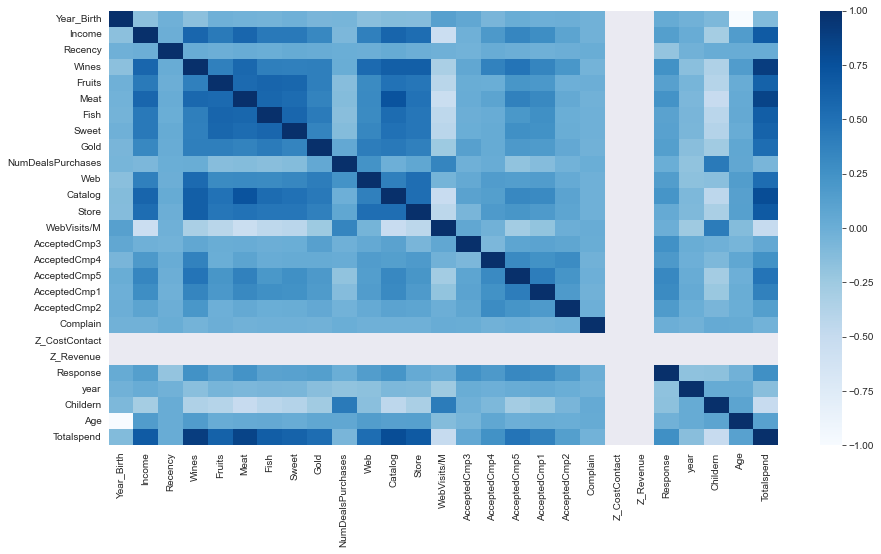

In [30]:
# heatmap for correlation
sns.heatmap(df.corr(), annot=False,cmap='Blues')

1. There is no relation of Z_costcontact and Z_response 
2. Age and Recency have list correlation with other
3. Total spending has highest correlation

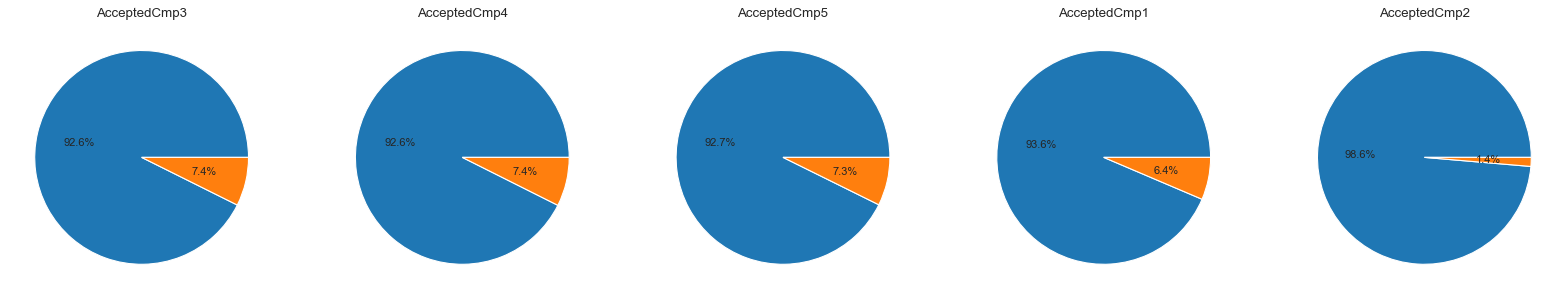

In [31]:
def count_promotion(cmp):
    p = [0,1]
    c = cmp.value_counts()
    plt.pie(c,autopct='%1.1f%%')

plt.figure(figsize=(25, 5), dpi=80)    

for i in range(17,22):
    plt.subplot(1,5,(i-16))
    count_promotion(df.iloc[:,i])
    plt.title(df.columns[i])

<AxesSubplot:xlabel='Age', ylabel='count'>

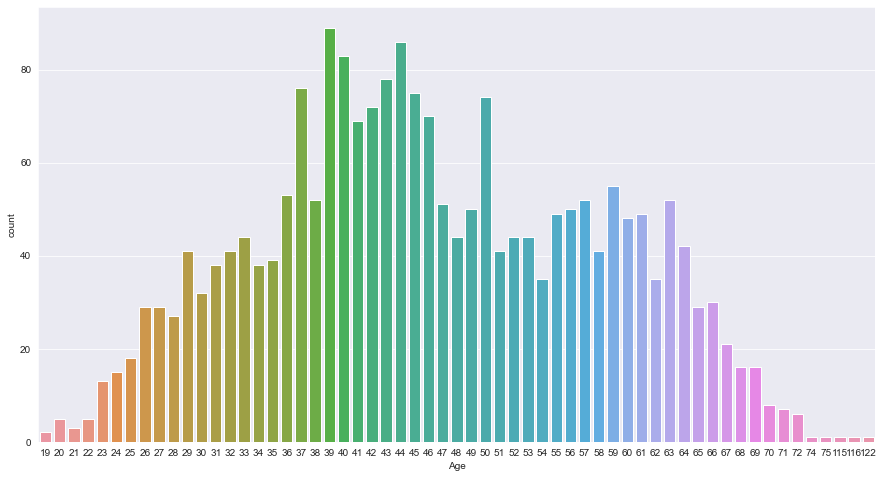

In [32]:
# count plots
sns.countplot(df['Age'])

In [33]:
print(df['Age'].max())
print(df['Age'].min()) 

122
19


<AxesSubplot:xlabel='Age', ylabel='Count'>

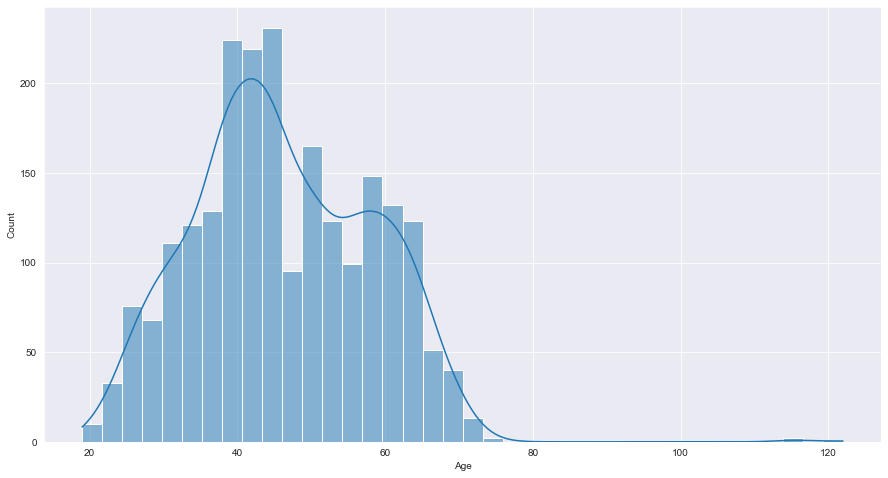

In [34]:
sns.histplot(df['Age'], kde= True)

In [35]:
px.histogram(df, x = 'Age')

<AxesSubplot:xlabel='Age'>

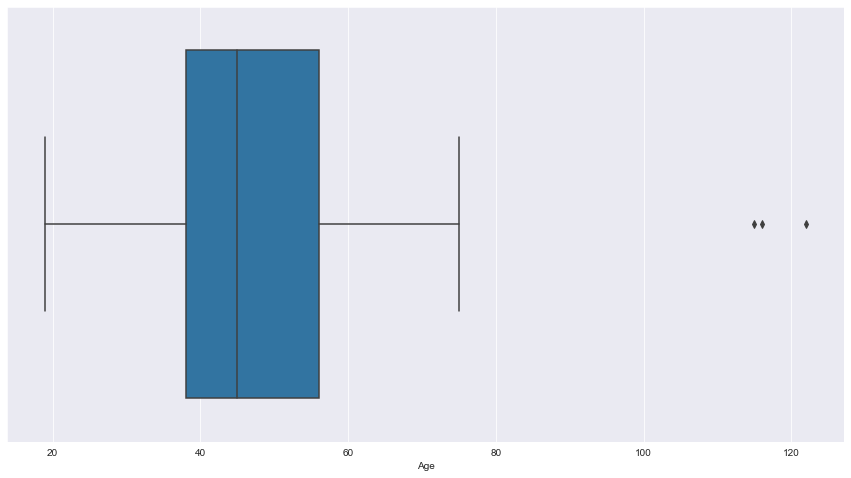

In [36]:
sns.boxplot(df['Age'])

In [37]:
px.box(df, x="Age")

1. There is 3 ages which are outlier

In [38]:
df.loc[df['Age'] <=19, "AgeGroup"] = "Teen"
df.loc[(df['Age'] >=20) & (df['Age'] <= 39), "AgeGroup"] = "Adults"
df.loc[(df['Age'] >=40) & (df['Age'] <= 59), "AgeGroup"] = "Middle Age Adults"
df.loc[(df['Age'] >= 60), "AgeGroup"] = "Seniors"

In [39]:
px.bar(data_frame=df.groupby(by=["AgeGroup",]).size().reset_index(name="counts"),
      x="AgeGroup", y="counts",)

In [40]:
#Converting to datetime
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [41]:
# MonthEnrollement

df['MonthEnrollement'] = (2015 - df.Dt_Customer.dt.year) * 12 + (1 - df.Dt_Customer.dt.month)
df.head()

Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  Wines  \
0        1957  Graduation         Single  58138.0  2012-09-04       58    635   
1        1954  Graduation         Single  46344.0  2014-03-08       38     11   
2        1965  Graduation        Married  71613.0  2013-08-21       26    426   
3        1984  Graduation        Married  26646.0  2014-02-10       26     11   
4        1981         PhD        Married  58293.0  2014-01-19       94    173   

   Fruits  Meat  Fish  ...  Complain  Z_CostContact  Z_Revenue  Response  \
0      88   546   172  ...         0              3         11         1   
1       1     6     2  ...         0              3         11         0   
2      49   127   111  ...         0              3         11         0   
3       4    20    10  ...         0              3         11         0   
4      43   118    46  ...         0              3         11         0   

   year  Childern  Age  Totalspend           AgeGroup  MonthEnrollement  
0  2012         0   58        1617  Middle Age Adults                28  
1  2014         2   61          27            Seniors                10  
2  2013         0   50         776  Middle Age Adults                17  
3  2014         1   31          53             Adults                11  
4  2014         1   34         422             Adults                12  

[5 rows x 32 columns]

<AxesSubplot:xlabel='Income', ylabel='Count'>

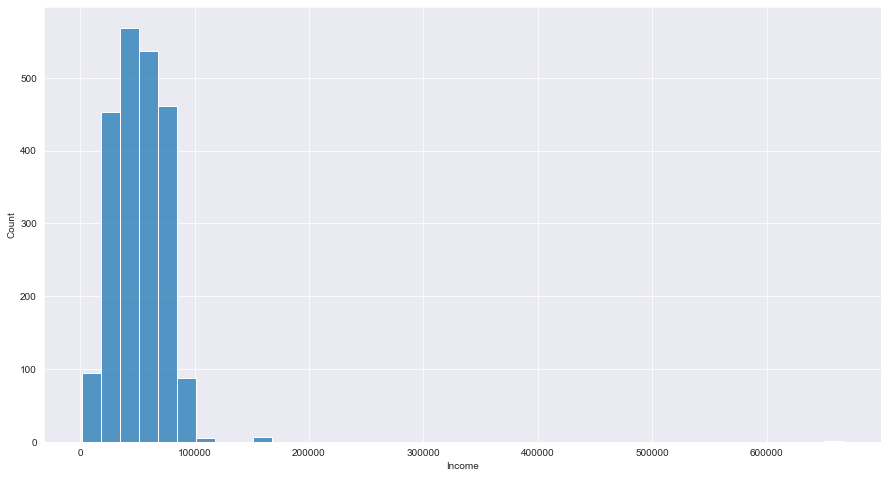

In [42]:
sns.histplot(df['Income'], bins = 40)

In [43]:
px.histogram(df, x = 'Income',nbins=50)

<AxesSubplot:xlabel='Income'>

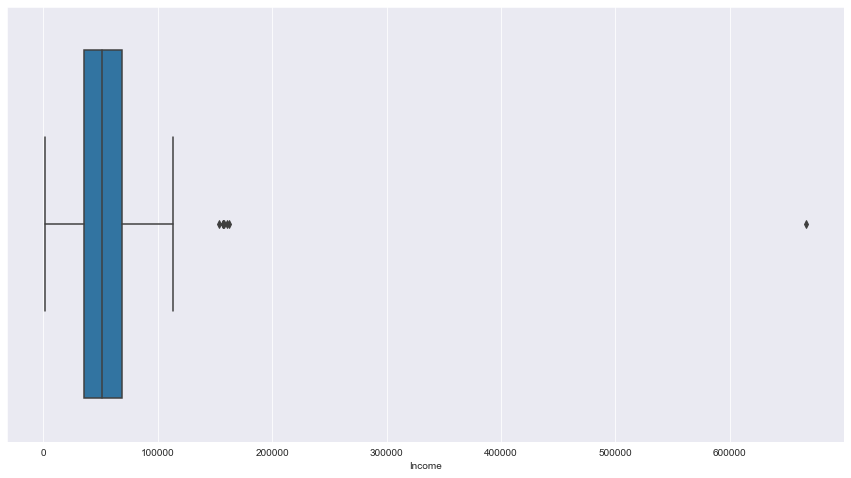

In [44]:
#outlier in income
sns.boxplot(df['Income'])

In [45]:
px.box(df, x="Income",color="AgeGroup")

# EDA :

In [46]:
fig = px.bar(df, x='Marital_Status', y='Totalspend', )
fig.show()

In [47]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()

**35% of the customer are single whereas more 64% are in relationship.**

In [48]:
fig = px.bar(df, x='Marital_Status', y='Totalspend', color="Education")
fig.show()

In [49]:
fig = px.histogram (df, x = "Totalspend",  facet_row = "Marital_Status",  )
fig.show ()

In [50]:
fig = px.histogram (df, x = "Totalspend",  facet_row = "Education",  )
fig.show ()

In [51]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  )
fig.show ()

In [52]:
fig =  px.pie (df, names = "Education", hole = 0.4, )
fig.show ()

In [53]:
#droping outliers from income :

df = df[df['Age'] < 100]
df = df[df['Income'] < 110000]

<AxesSubplot:xlabel='Age', ylabel='Count'>

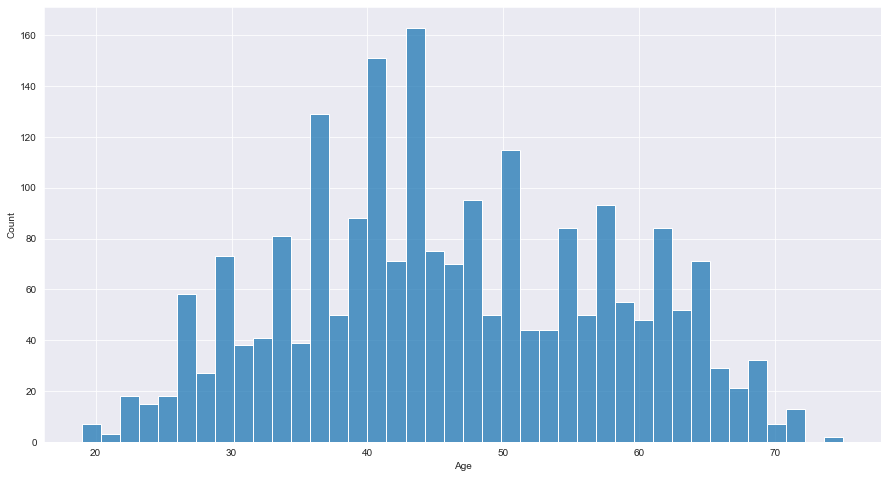

In [54]:
sns.histplot(df['Age'], bins = 40)

In [55]:
px.histogram(data_frame=df, x="Age",nbins=40)

In [56]:
px.box(df,x="Age")

In [57]:
px.histogram(df, x = 'Income')

In [58]:
px.box(df, x='Income')

In [59]:
df.head()

Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  Wines  \
0        1957  Graduation         Single  58138.0  2012-09-04       58    635   
1        1954  Graduation         Single  46344.0  2014-03-08       38     11   
2        1965  Graduation        Married  71613.0  2013-08-21       26    426   
3        1984  Graduation        Married  26646.0  2014-02-10       26     11   
4        1981         PhD        Married  58293.0  2014-01-19       94    173   

   Fruits  Meat  Fish  ...  Complain  Z_CostContact  Z_Revenue  Response  \
0      88   546   172  ...         0              3         11         1   
1       1     6     2  ...         0              3         11         0   
2      49   127   111  ...         0              3         11         0   
3       4    20    10  ...         0              3         11         0   
4      43   118    46  ...         0              3         11         0   

   year  Childern  Age  Totalspend           AgeGroup  MonthEnrollement  
0  2012         0   58        1617  Middle Age Adults                28  
1  2014         2   61          27            Seniors                10  
2  2013         0   50         776  Middle Age Adults                17  
3  2014         1   31          53             Adults                11  
4  2014         1   34         422             Adults                12  

[5 rows x 32 columns]

# EDA

# Marital_Status

In [60]:
marital_group = df.groupby("Marital_Status").agg( 
    TotalRecords = ("Marital_Status", "size"),
    TotalAmount = ("Totalspend", "sum"),
    AvgAmount = ("Totalspend", "mean")
   )

marital_group

TotalRecords  TotalAmount   AvgAmount
Marital_Status                                       
Married                 1422       848610  596.772152
Single                   782       489155  625.517903

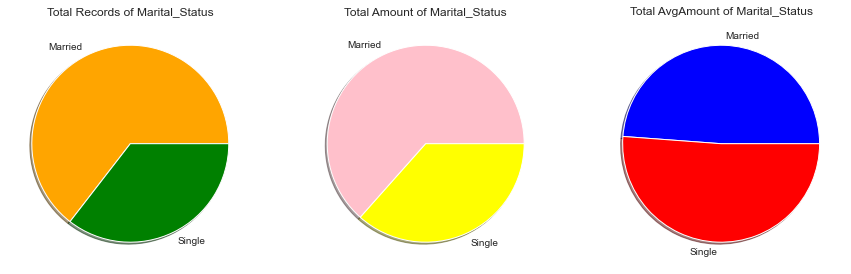

In [61]:
plt.figure(figsize= (15,10))

plt.subplot(1,3,1)
plt.pie(x = marital_group.TotalRecords, labels= marital_group.index, colors= ['orange', 'green'], shadow= True)
plt.title(f"Total Records of {marital_group.index.name}")


plt.subplot(1,3,2)
plt.pie(x = marital_group.TotalAmount, labels= marital_group.index, colors= ['pink', 'yellow'], shadow= True)
plt.title(f"Total Amount of {marital_group.index.name}")


plt.subplot(1,3,3)
plt.pie(x = marital_group.AvgAmount, labels= marital_group.index, colors= ['blue', 'red'], shadow= True)
plt.title(f"Total AvgAmount of {marital_group.index.name}")


plt.show()

# Age_group

In [62]:
age_group = df.groupby("AgeGroup").agg( 
    TotalRecords = ("AgeGroup", "size"),
    TotalAmount = ("Totalspend", "sum"),
    AvgAmount = ("Totalspend", "mean")
   )

age_group

TotalRecords  TotalAmount   AvgAmount
AgeGroup                                                
Adults                      683       368194  539.083455
Middle Age Adults          1160       700998  604.308621
Seniors                     359       268435  747.729805
Teen                          2          138   69.000000

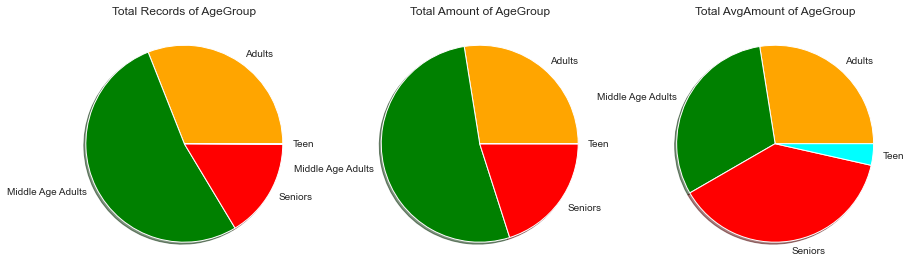

In [63]:
plt.figure(figsize= (15,10))

plt.subplot(1,3,1)
plt.pie(x = age_group.TotalRecords, labels= age_group.index, colors= ['orange', 'green', 'red', 'cyan'], shadow= True)
plt.title(f"Total Records of {age_group.index.name}")


plt.subplot(1,3,2)
plt.pie(x = age_group.TotalAmount, labels= age_group.index, colors= ['orange', 'green', 'red', 'cyan'], shadow= True)
plt.title(f"Total Amount of {age_group.index.name}")


plt.subplot(1,3,3)
plt.pie(x = age_group.AvgAmount, labels= age_group.index, colors= ['orange', 'green', 'red', 'cyan'], shadow= True)
plt.title(f"Total AvgAmount of {age_group.index.name}")


plt.show()

# Cluster_Modeling

In [64]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',
       'NumDealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisits/M',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'year', 'Childern', 'Age', 'Totalspend', 'AgeGroup',
       'MonthEnrollement'],
      dtype='object')

In [65]:
final_df = df.drop(
    [
      'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer',
        'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',
       'NumDealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisits/M',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'year', 'AgeGroup',
    ],
    
    axis = 1
)

In [66]:
final_df.head()

Income  Recency  Childern  Age  Totalspend  MonthEnrollement
0  58138.0       58         0   58        1617                28
1  46344.0       38         2   61          27                10
2  71613.0       26         0   50         776                17
3  26646.0       26         1   31          53                11
4  58293.0       94         1   34         422                12

In [67]:
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

In [68]:
model = KMeans()
model.fit(final_df)

KMeans()

In [69]:
model.labels_

array([0, 4, 5, ..., 0, 5, 0])

In [70]:
clusterRange = range(2,21)
inertiaRange = []
silhouterange = []

for m in clusterRange:
    model_m = KMeans(n_clusters=m)
    model_m.fit(final_df)
    inertiaRange.append(model_m.inertia_)
    silhouterange.append(metrics.silhouette_score(final_df, model_m.labels_))

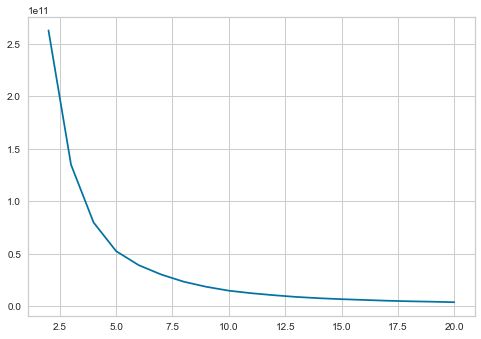

In [71]:
plt.plot(clusterRange, inertiaRange)

In [72]:
print(list(clusterRange))
print("\n")
print(inertiaRange)
print("\n")
print(silhouterange)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


[262862342862.62268, 134847288605.30309, 79825675323.06487, 52517419188.52275, 39163676059.92831, 30221484154.944317, 23368938922.87271, 18521421471.89856, 14817717477.866116, 12404124463.623394, 10493440021.259674, 8854713810.55356, 7652748330.909398, 6726979317.463499, 5993545235.952089, 5271548769.719302, 4726935729.467976, 4321850428.346606, 3835066068.1511965]


[0.6113220032279282, 0.5494963435425407, 0.5369636858052939, 0.5379489885087428, 0.5210267516620961, 0.5138833410654248, 0.5166053829558424, 0.5231042248476829, 0.5233526437142043, 0.5221650450857372, 0.5213850872338047, 0.5213851693478738, 0.5188827985621345, 0.5172465400205495, 0.5178323409325123, 0.5199327824545147, 0.5214901218564847, 0.5158599075740343, 0.518584335388799]


**Number of cluster will be 4**

In [73]:
model = KMeans(n_clusters=4)
model.fit(final_df)

KMeans(n_clusters=4)

In [74]:
prediction = pd.DataFrame( model.labels_, columns= ['labels'])

In [75]:
prediction.head()

labels
0       0
1       1
2       2
3       3
4       0

In [76]:
test = [545.0,58,58,1617,0,33]

In [77]:
model.predict([test])

array([3])

# Cluster Modelling using Affinity Clustering Model

Affinity Propagation involves finding a set of exemplars that best summarize the data.

It is implemented via the AffinityPropagation class and the main configuration to tune is the “damping” set between 0.5 and 1, and perhaps “preference.”

In [78]:
from sklearn.cluster import AffinityPropagation
#Initiating the Affinity Clustering model 
AP = AffinityPropagation(damping=0.9)
# fit model and predict clusters
AP_df = AP.fit_predict(final_df)
final_df["Clusters"] = AP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= AP_df

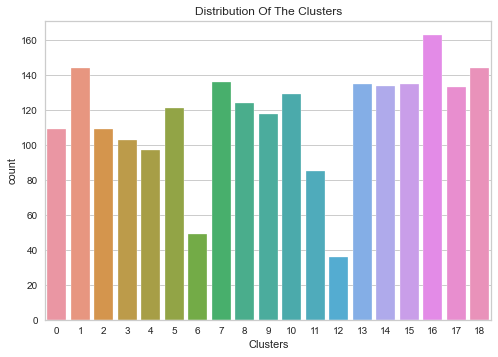

In [79]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

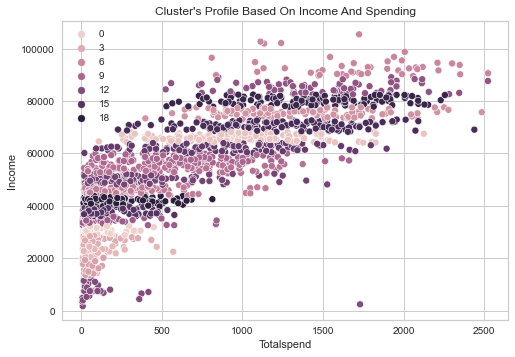

In [80]:
pl = sns.scatterplot(data = df,x=df["Totalspend"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

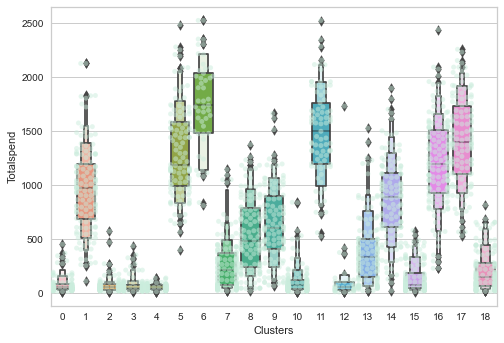

In [81]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Totalspend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Totalspend"])
plt.show()

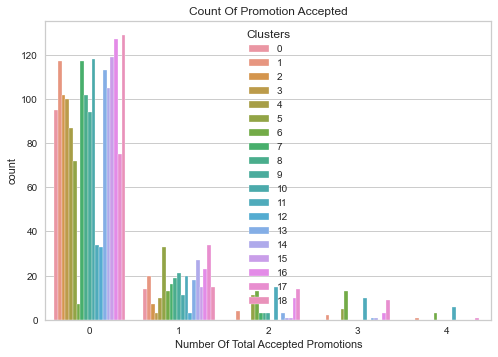

In [82]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

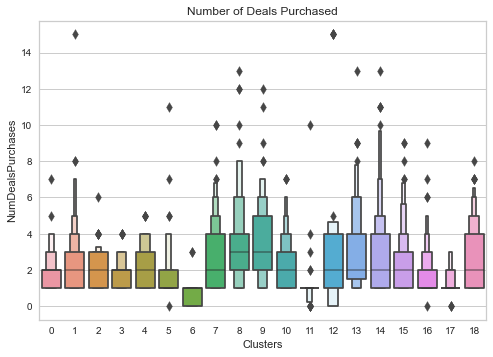

In [83]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

# BIRCH
**BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies)** involves constructing a tree structure from which cluster centroids are extracted.

It is implemented via the Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters, the latter of which provides an estimate of the number of clusters

In [84]:
from sklearn.cluster import Birch
#Initiating the Birch Clustering model 
BP = Birch(threshold=0.01, n_clusters=4)
# fit model and predict clusters
BP_df = BP.fit_predict(final_df)
final_df["Clusters"] = BP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= BP_df

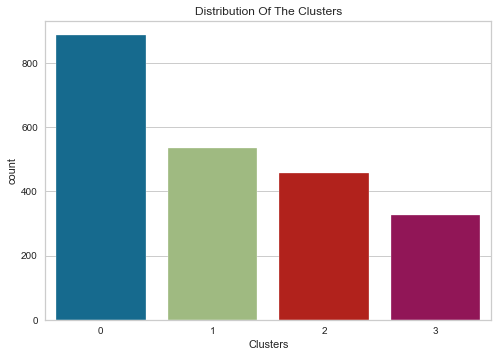

In [85]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

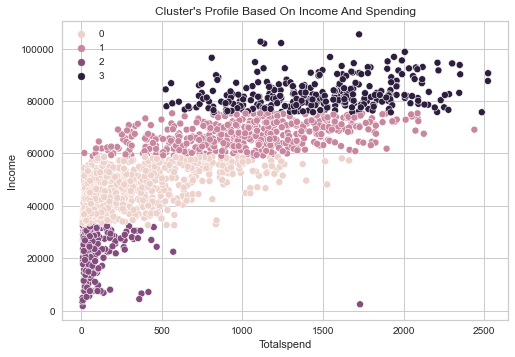

In [86]:
pl = sns.scatterplot(data = df,x=df["Totalspend"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

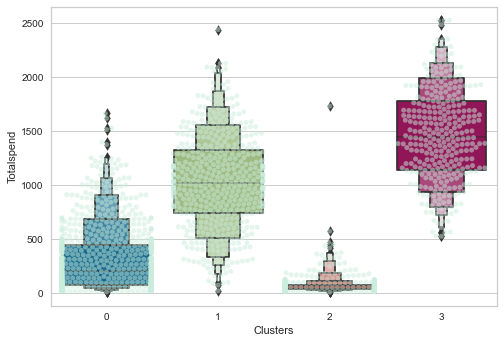

In [87]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Totalspend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Totalspend"])
plt.show()

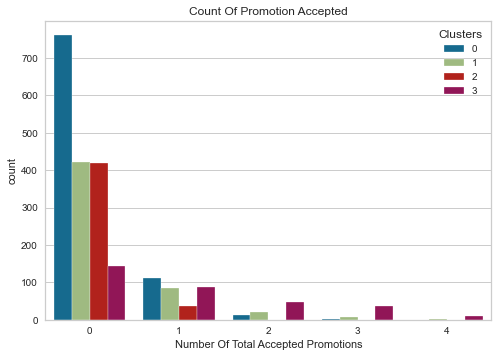

In [88]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

# DBSCAN
**DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise)** involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.


It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

In [89]:
from sklearn.cluster import DBSCAN
#Initiating the BBSCAN Clustering model 
DP = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
DP_df = DP.fit_predict(final_df)
final_df["Clusters"] = DP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= DP_df

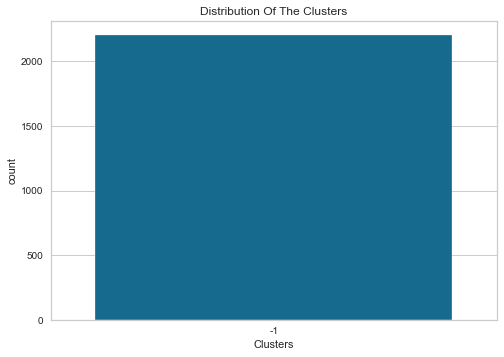

In [90]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

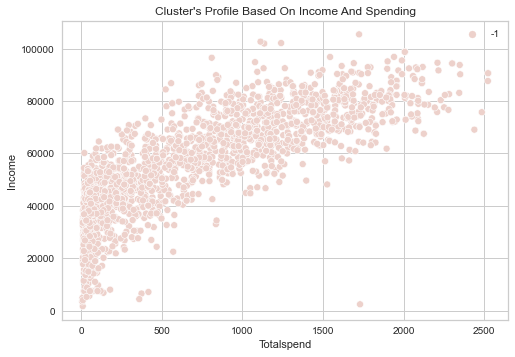

In [91]:
pl = sns.scatterplot(data = df,x=df["Totalspend"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

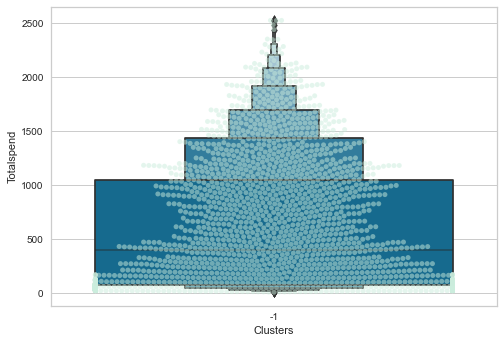

In [92]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Totalspend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Totalspend"])
plt.show()

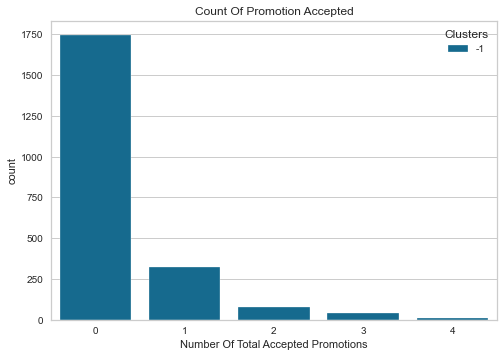

In [93]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

# Mini-Batch K-Means
**Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise**.

**It is implemented via the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data**.

In [94]:
from sklearn.cluster import MiniBatchKMeans
#Initiating the MiniBatchKMeans Clustering model 
MP = MiniBatchKMeans(n_clusters=4)
# fit model and predict clusters
MP_df = MP.fit_predict(final_df)
final_df["Clusters"] = MP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= MP_df

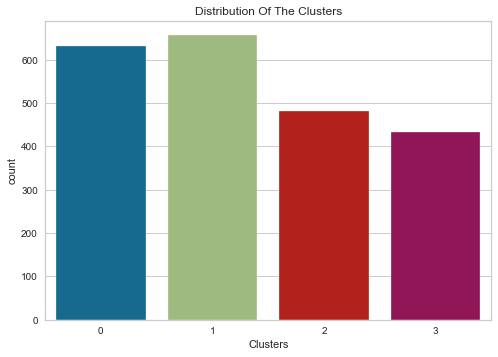

In [95]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

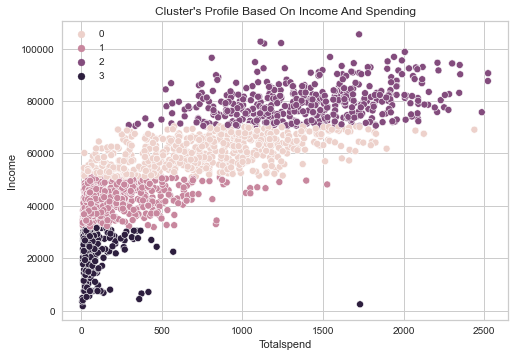

In [96]:
pl = sns.scatterplot(data = df,x=df["Totalspend"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

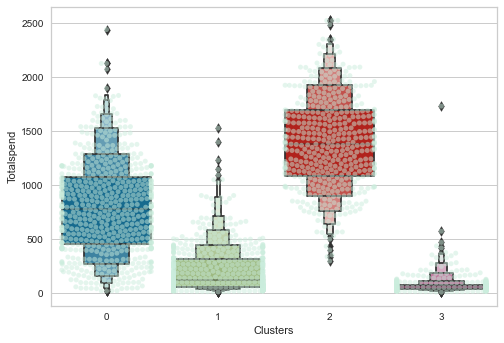

In [97]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Totalspend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Totalspend"])
plt.show()


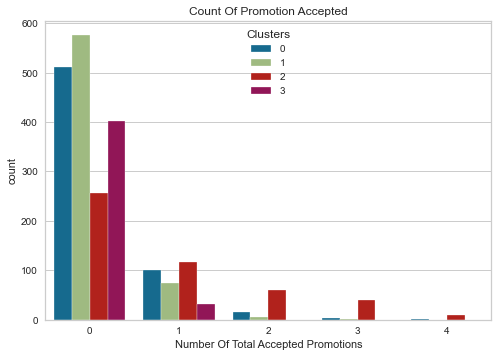

In [98]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

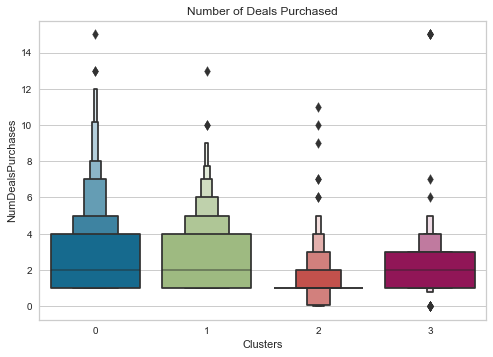

In [99]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()